In [1]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz, convolve
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import matplotlib.pyplot as plt
from com.sbk.dspbase.filters.windowedsinc.windowed_sinc import blackman_windowed_sinc_normalized
import numpy as np
from com.sbk.dspbase.dft import dft

In [2]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

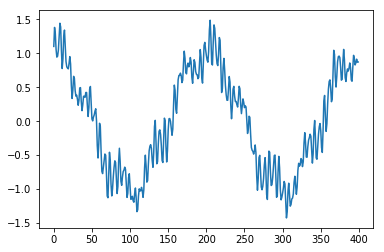

In [3]:
plt.plot(x)
plt.show()

In [4]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 20.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))




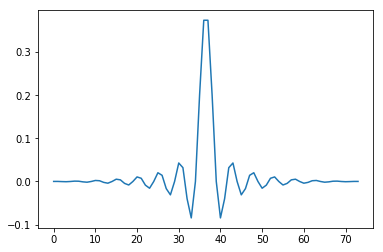

In [5]:
plt.plot(taps)
plt.show()

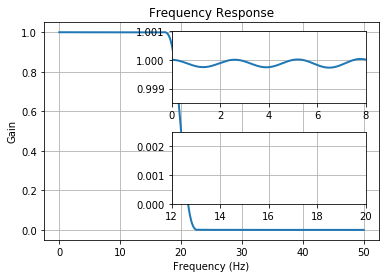

In [6]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

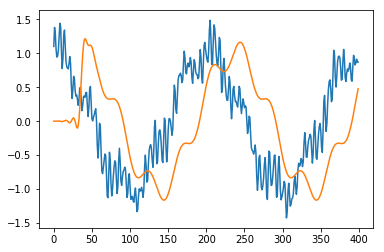

In [18]:
filtered_x = lfilter(taps, 1.0, x)
plt.plot(x)
plt.plot(filtered_x)
plt.show()

In [33]:
kernel_length = 4
frequency_cut_off = 0.6

t, h = blackman_windowed_sinc_normalized(kernel_length=kernel_length, cut_off=frequency_cut_off)

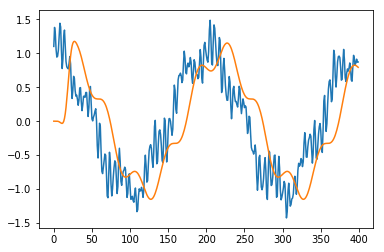

In [34]:
my_filtered_x = lfilter(h, 1.0, x)
plt.plot(x)
plt.plot(my_filtered_x)
plt.show()

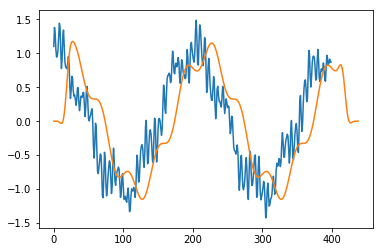

In [37]:
my_filtered_x_2 = convolve(h, x)
plt.plot(x)
plt.plot(my_filtered_x_2)
plt.show()

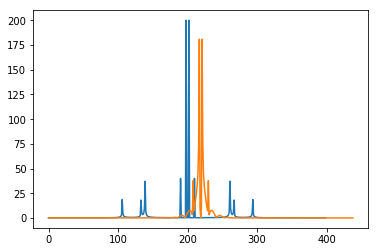

In [48]:


X = np.fft.fftshift(np.fft.fft(x))
X_F = np.fft.fftshift(np.fft.fft(my_filtered_x_2))
plt.plot(abs(X))
plt.plot(abs(X_F))
plt.show()